Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [37]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
plt.style.use('ggplot')

import chap01
df = chap01.ReadFemPreg()
df.is_copy = False

Print value counts for <tt>birthord</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [2]:
df.birthord.value_counts().sort_index()

1     4413
2     2874
3     1234
4      421
5      126
6       50
7       20
8        7
9        2
10       1
dtype: int64

Print value counts for <tt>prglngth</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [240]:
length = df.prglngth.value_counts().sort_index()
print sum(length[:14])
print sum(length[14:27])
print sum(length[27:])

3522
793
9278


Print value counts for <tt>agepreg</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611935).

Looking at this data, please remember my comments in the book about the obligation to approach data with consideration for the context and respect for the respondents.

In [241]:
age = df.agepreg

count = 0
count1 = 0
count2 = 0
count3 = 0

for i in age:
    if i < 20:
        count += 1
    elif 20 <= i < 25:
        count1 += 1
    elif 25 <= i < 30:
        count2 += 1
    else: 
        count3 += 1
        
print "under 20:", count
print "under 25:", count1
print "under 30:", count2
print "30+:", count3

under 20: 3182
under 25: 4246
under 30: 3178
30+: 2987


Compute the mean birthweight.

In [3]:
df.totalwgt_lb.mean()

7.2656284576233681

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [72]:
df['totalwgt_kg'] = df.totalwgt_lb / 2.2
    
df.totalwgt_kg.mean()

3.302558389828807

Look through the codebook and find a variable, other than the ones mentioned in the book, that you find interesting.  Compute values counts, means, or other statistics.

In [3]:
leave = df.matleave
leave.value_counts().sort_index()

0     421
1      36
2      61
3      37
4      70
5      26
6     230
7      19
8     113
9      24
10     49
11      8
12     85
13      4
14      5
15      4
16     15
17      1
18      1
19      2
20      7
22      1
24      6
25      2
26      2
30      1
32      5
36      2
38      1
40      1
50      1
52      1
97      1
99      3
dtype: int64

In [5]:
leave.mean()

5.340562248995984

In [52]:
poor = df[df.poverty < 150]
not_poor = df[df.poverty >= 150]

poor_leave = poor.matleave
not_poor_leave = not_poor.matleave

poor_worked = poor.didwork
not_poor_worked = not_poor.didwork

poor_pmf = poor_leave.value_counts().sort_index() / len(poor)
not_poor_pmf = not_poor_leave.value_counts().sort_index() / len(not_poor_leave)

In [64]:
print len(poor_worked)
print poor_worked.value_counts().sort_index()

5583
1     54
2     61
3    158
dtype: int64


In [63]:
print len(not_poor_worked)
not_poor_worked.value_counts().sort_index()

8010


1     92
2     32
3    195
7      1
dtype: int64

The following chart depicts differences in probability of each duration of maternity leave between women in households at 150 percent of more of the 2002 federal poverty level and below 150 percent of the 2002 federal poverty level.

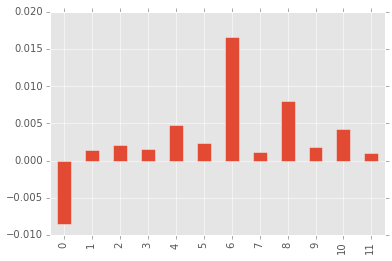

In [47]:
weeks = range(0,12)
difs = []

for x in weeks:
    try:
        poor_p = poor_pmf[x]
    except KeyError:
        poor_p = 0
    try:
        not_poor_p = not_poor_pmf[x]
    except KeyError:
        not_poor_p = 0
    dif = not_poor_p - poor_p
    difs.append(dif)
    
pd.DataFrame(difs).plot(kind='bar', legend=False)

[key](http://bit.ly/1GZUcPB)

1 - DID NOT NEED TO TAKE MATERNITY LEAVE  
2 - WERE NOT OFFERED OR ALLOWED TO TAKE MATERNITY LEAVE  
3 - SOME OTHER REASON  
7 - NOT ASCERTAINED

In [251]:
didwork = df.didwork.value_counts().sort_index()

def total(set):
    count = 0
    for i in set:
        count += i
    return count
        
total = total(didwork)

In [252]:
for i in didwork:
    percent = float(i) / float(total) * 100
    print percent

24.6205733558
15.6829679595
59.5278246206
0.168634064081


Create a boolean Series.

In [4]:
df.outcome == 1

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14    False
...
13578     True
13579     True
13580    False
13581     True
13582    False
13583    False
13584     True
13585    False
13586    False
13587    False
13588     True
13589    False
13590    False
13591     True
13592     True
Name: outcome, Length: 13593, dtype: bool

Use a boolean Series to select the records for the pregnancies that ended in live birth.

In [133]:
live = df[df.outcome == 1]
len(live)

9148

Count the number of live births with <tt>birthwgt_lb</tt> between 0 and 5 pounds (including both).  The result should be 1125.

In [134]:
len(live[(live.birthwgt_lb >= 0) & (live.birthwgt_lb <= 5)])

1125

Count the number of live births with <tt>birthwgt_lb</tt> between 9 and 95 pounds (including both).  The result should be 798 

In [135]:
len(live[(live.birthwgt_lb >= 9) & (live.birthwgt_lb <= 95)])

798

Use <tt>birthord</tt> to select the records for first babies and others.  How many are there of each?

In [145]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
len(firsts), len(others)

(4413, 4735)

Compute the mean weight for first babies and others.

In [146]:
firsts.totalwgt_lb.mean()

7.201094430437772

In [147]:
others.totalwgt_lb.mean()

7.325855614973262

Compute the mean <tt>prglngth</tt> for first babies and others.  Compute the difference in means, expressed in hours.

In [148]:
firsts = firsts.prglngth.mean()
others = others.prglngth.mean()

dif = firsts - others

dif * 7 * 24

13.11026081862832